# Electrocardiograms

👇 Import the data located in the folder and display its first 5 rows

In [33]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


Each obervation of the dataset is a numerically represented heartbeat, taken from a patient's electrocardiogram (ECG). The target is binary and defines whether the heartbeat is at risk of cardiovascular desease [1] or not [0]. 


The **task** is to build a model that can **flag at-risk observations** while **limiting false alarms**. 

## 1. Data Exploration

👇 Visualise an observation of each class to get an idea of what the numbers represent

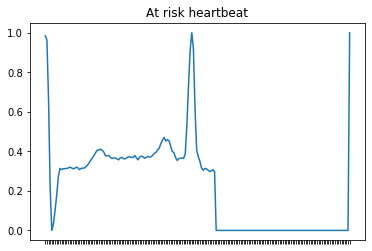

In [34]:
import matplotlib.pyplot as plt

plt.plot(data.iloc[3])
plt.tick_params(labelbottom=False)
plt.title('At risk heartbeat')
plt.show()

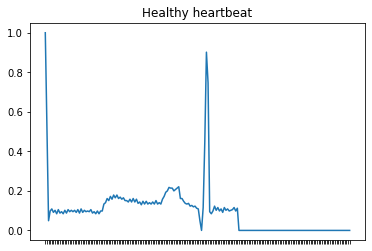

In [35]:
plt.plot(data.iloc[19560])
plt.tick_params(labelbottom=False)
plt.title('Healthy heartbeat')
plt.show()

👇 How many observations of each classes are there?

In [36]:
data.target.value_counts()

0    18117
1     1448
Name: target, dtype: int64

## 2.  Logistic Regression

👇 Cross-validate a `LogisticRegression` model and return the following metrics:
- Recall
- Accuracy
- F1
- Precision

In [37]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Ready X and y
X = data.loc[:, 'x_1':'x_187']
y = data['target']

# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000), X, y, cv=10, 
                            scoring=['accuracy','recall','precision','f1'])

❓ What is the model's accuracy score?

In [78]:
log_cv_results['test_accuracy'].mean()

0.9390746917624634

❓ What percentage of at-risk heartbeats is the model able to flag?

In [79]:
log_cv_results['test_recall'].mean()

0.32938697318007665

❓ When the model signals an at-risk heartbeat, how often is it correct?

In [80]:
log_cv_results['test_precision'].mean()

0.6832685782552069

❓ What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?

In [81]:
log_cv_results['test_f1'].mean()

0.443460572263365

## 3.  KNN Classifier

👇 Cross-validate a `KNNClassifier`  model with `n_neighbors=5` and return the following metrics:
- Recall
- Accuracy
- F1
- Precision

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# 10-Fold Cross validate model
knn_cv_results = cross_validate(KNeighborsClassifier(n_neighbors=5), X, y, cv=10, 
                            scoring=['f1','accuracy','recall','precision'])


❓ What is the model's ability to correctly predict at-risk heartbeats?

In [45]:
knn_cv_results['test_precision'].mean()

0.9438330326255999

❓ What is the model's precision/recall tradeoff score?

In [46]:
knn_cv_results['test_f1'].mean()

0.9041585493379827

❓ What is the model's percentage of correct predictions?

In [43]:
knn_cv_results['test_accuracy'].mean()

0.9864040573767493

❓ What is the model's recall score?

In [44]:
knn_cv_results['test_recall'].mean()

0.8680507662835248

## 4. Model Selection

❓ Considering your **task** is to **flag at-risk observations** while **limiting false alarms**, which model would you pick?

<details>
<summary>Answer</summary>

You surely have noticed by now that the KNN model is best suited for the task. You also should have noticed that a high accuracy does not necessarily mean a highly performing model. Knowing which metric to observe is key and specific to each task and dataset.

</details>



## 5. Confusion Matrix

👇 Using `plot_confusion_matrix`,  visualize the confusion matrix of the KNN Classifier (`n_neighbors=5`).

[`plot_confusion_matrix` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html)

<details>
<summary>💡 Hints</summary>

- `plot_confusion_matrix` takes a trained model as input
    
- Make sure you generalise
    
- Look into the `normalize` parameter
  
</details>



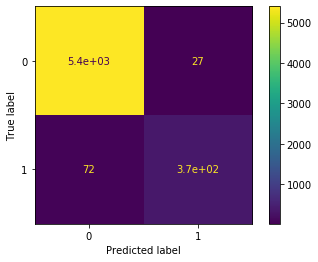

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Instanciate and fit the model
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

# Plot confusion matrix
plot_confusion_matrix(knn_model, X_test, y_test)

❓ How **many** false alarms does the model produce?

<details>
<summary>Answer</summary>
 
The answer is the count of 0's predicted as 1's.
    
</details>


❓ What **percentage** of potentially at risk heartbeats does the model miss out on?

<details>
<summary>💡 Hint</summary>

- Look into the `normalize` parameter 😉
  
</details>



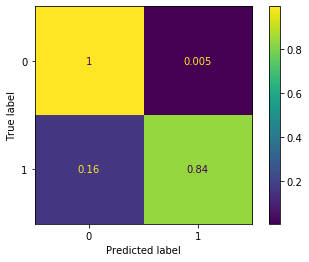

In [84]:
# Plot confusion matrix with predictions displayed as percentages
plot_confusion_matrix(knn_model, X_test, y_test, normalize = 'true')

<details>
<summary>Answer</summary>
 
The answer is the 1's predicted as 0's as a percentage.
    
</details>


## 5. Prediction

👇 A patient comes to you for a second opinion on what he was told may be an at risk heartbeat. Use your model to get some insight.

In [71]:
new_data = pd.read_csv('new_data.csv')

new_data

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_178,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187
0,0.904762,0.993197,1.0,0.956916,0.902494,0.857143,0.802721,0.777778,0.709751,0.557823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
knn_model.predict(new_data)

array([1])

⚠️ Please, push your exercice once completed 🙃

# 🏁